In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('bd_students_per.csv')
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime                    8612

In [6]:
df.isnull().sum().sum()

15

In [7]:
df.duplicated().sum()

0

In [8]:
df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
id,8612.000000,4307.500000,2486.214593,2.000000,2154.750000,4307.500000,6460.250000,8613.000000
math,8612.000000,72.938110,15.816147,33.000000,64.000000,73.000000,84.000000,100.000000
english,8612.000000,73.610427,15.343903,18.000000,64.000000,75.000000,85.000000,100.000000
science,8612.000000,73.524036,15.115104,33.000000,63.000000,75.000000,85.000000,100.000000
social_science,8612.000000,74.465513,14.945846,36.000000,65.000000,77.000000,86.000000,100.000000
art_culture,8612.000000,76.236066,13.619125,36.000000,69.000000,76.000000,86.000000,100.000000
attendance,8612.000000,74.027055,13.290046,30.000000,63.000000,73.000000,86.000000,100.000000
studytime,8612.000000,4.746168,2.185645,1.000000,3.000000,5.000000,6.000000,16.000000
family_size,8612.000000,4.502206,1.656726,0.000000,3.000000,5.000000,6.000000,11.000000
age,8612.000000,16.614375,0.969057,10.000000,16.000000,17.000000,17.000000,24.000000


In [9]:
age_distribution = df['age'].value_counts().sort_index()
print("Age Distribution:")
print(age_distribution)

Age Distribution:
age
10       2
15    1239
16    2424
17    3484
18    1336
19     126
24       1
Name: count, dtype: int64


In [10]:
gender_distribution = df['gender'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)


Gender Distribution:
gender
Male      4337
Female    4275
Name: count, dtype: int64


In [11]:
family_size_distribution = df['family_size'].value_counts().sort_index()
print("\nFamily Size Distribution:")
print(family_size_distribution)


Family Size Distribution:
family_size
0        7
2     1293
3     1407
4     1557
5     1657
6     1438
7     1216
8       27
9        5
10       3
11       2
Name: count, dtype: int64


In [12]:
mother_education_distribution = df['mother_education'].value_counts()
father_education_distribution = df['father_education'].value_counts()

print("\nMother's Education Distribution:")
print(mother_education_distribution)

print("\nFather's Education Distribution:")
print(father_education_distribution)


Mother's Education Distribution:
mother_education
SSC             1492
HSC             1370
Diploma         1297
Under_SSC       1119
Non_Educated    1070
Honors          1061
Masters         1029
Hons             164
Name: count, dtype: int64

Father's Education Distribution:
father_education
HSC             1345
SSC             1343
Masters         1286
Diploma         1259
Honors          1121
Non_Educated    1072
Under_SSC       1029
Hons             153
Name: count, dtype: int64


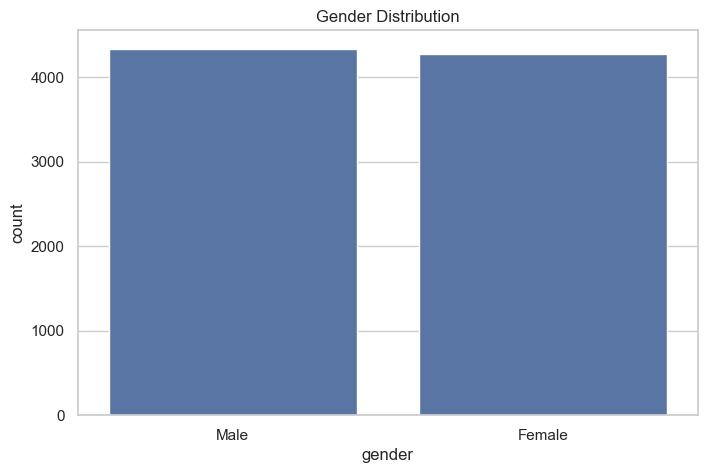

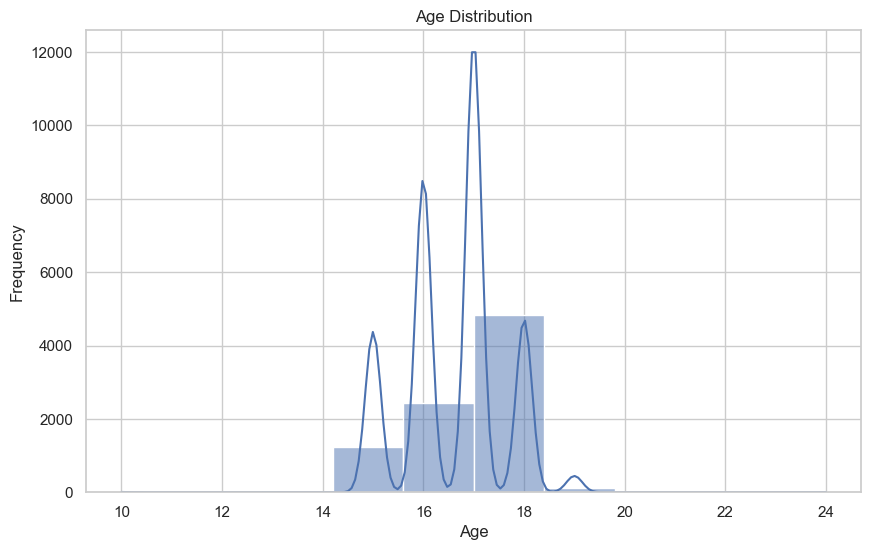

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Plotting Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
summary = df.groupby('location').agg({
    'english': ['mean', 'std', 'count'],  # Mean, standard deviation, and count of students
    'math': ['mean', 'std'],
    'science': ['mean', 'std'],
    'attendance': ['mean', 'std'],
    'internet_access': lambda x: (x == 'Yes').mean(),  # Proportion with internet access
    'parental_involvement': lambda x: (x == 'Yes').mean()  # Proportion with parental involvement
}).reset_index()
summary.columns = ['Location', 'English Mean', 'English Std', 'Count', 
                   'Math Mean', 'Math Std', 
                   'Science Mean', 'Science Std', 
                   'Attendance Mean', 'Attendance Std', 
                   'Internet Access Proportion', 
                   'Parental Involvement Proportion']

print(summary)

  Location  English Mean  English Std  Count  Math Mean   Math Std  \
0     City     74.124201    15.178036   2971  73.542578  15.793761   
1    Rural     71.555512    14.835035   2549  70.701844  15.402723   
2    Urban     73.625957    15.620487   2874  73.026792  15.887449   
3     city     90.187500     5.931034    128  90.398438   6.127696   
4    urban     90.966292     6.176292     89  88.865169   6.118510   

   Science Mean  Science Std  Attendance Mean  Attendance Std  \
0     73.821609    15.331219        74.908785       13.292112   
1     71.781483    14.386285        71.683405       13.316806   
2     73.513222    15.228049        74.596033       13.120263   
3     90.078125     6.270302        82.648438        9.318164   
4     89.966292     6.291136        80.966292        9.348614   

   Internet Access Proportion  Parental Involvement Proportion  
0                    0.554695                         0.537529  
1                    0.530012                         0.53

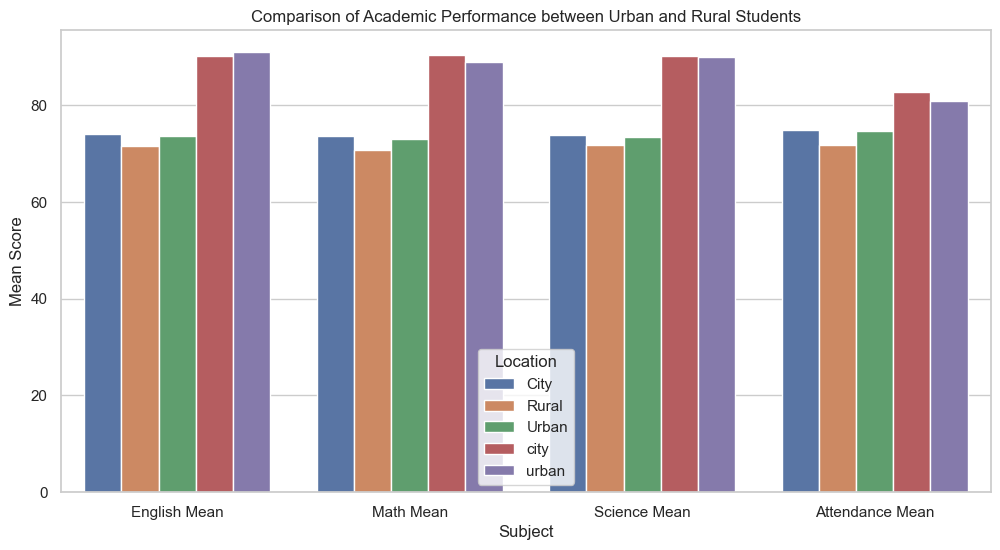

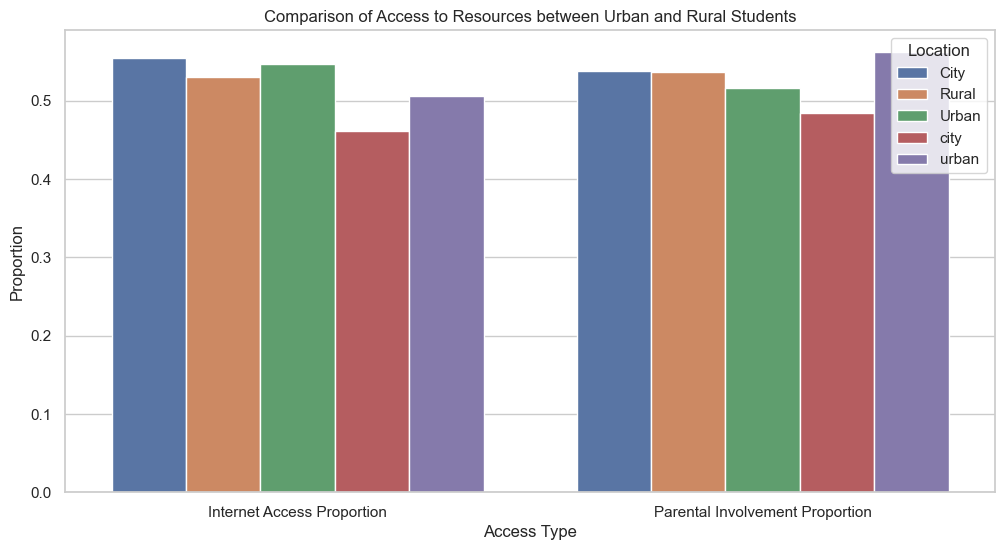

In [20]:
sns.set(style="whitegrid")

# Performance Comparison
performance_columns = ['English Mean', 'Math Mean', 'Science Mean', 'Attendance Mean']

# Melt the DataFrame for easier plotting
performance_summary = summary.melt(id_vars=['Location'], value_vars=performance_columns,
                                    var_name='Subject', value_name='Mean Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='Mean Score', hue='Location', data=performance_summary)
plt.title('Comparison of Academic Performance between Urban and Rural Students')
plt.ylabel('Mean Score')
plt.show()

# Internet Access and Parental Involvement
access_columns = ['Internet Access Proportion', 'Parental Involvement Proportion']

# Melt the DataFrame for easier plotting
access_summary = summary.melt(id_vars=['Location'], value_vars=access_columns,
                               var_name='Access Type', value_name='Proportion')

plt.figure(figsize=(12, 6))
sns.barplot(x='Access Type', y='Proportion', hue='Location', data=access_summary)
plt.title('Comparison of Access to Resources between Urban and Rural Students')
plt.ylabel('Proportion')
plt.show()

In [22]:
summary = df.groupby('parental_involvement').agg({
    'english': ['mean', 'std', 'count'],  # Mean, standard deviation, and count of students
    'math': ['mean', 'std'],
    'science': ['mean', 'std'],
    'attendance': ['mean', 'std']
}).reset_index()

# Rename the columns for better readability
summary.columns = ['Parental Involvement', 'English Mean', 'English Std', 'Count', 
                   'Math Mean', 'Math Std', 
                   'Science Mean', 'Science Std', 
                   'Attendance Mean', 'Attendance Std']

print(summary)

  Parental Involvement  English Mean  English Std  Count  Math Mean  \
0                   No     73.474944    15.392159   4051  72.583066   
1                  Yes     73.730761    15.301598   4561  73.253453   

    Math Std  Science Mean  Science Std  Attendance Mean  Attendance Std  
0  15.824179     73.373241    15.083010        73.771168       13.244005  
1  15.804057     73.657970    15.143947        74.254330       13.328138  


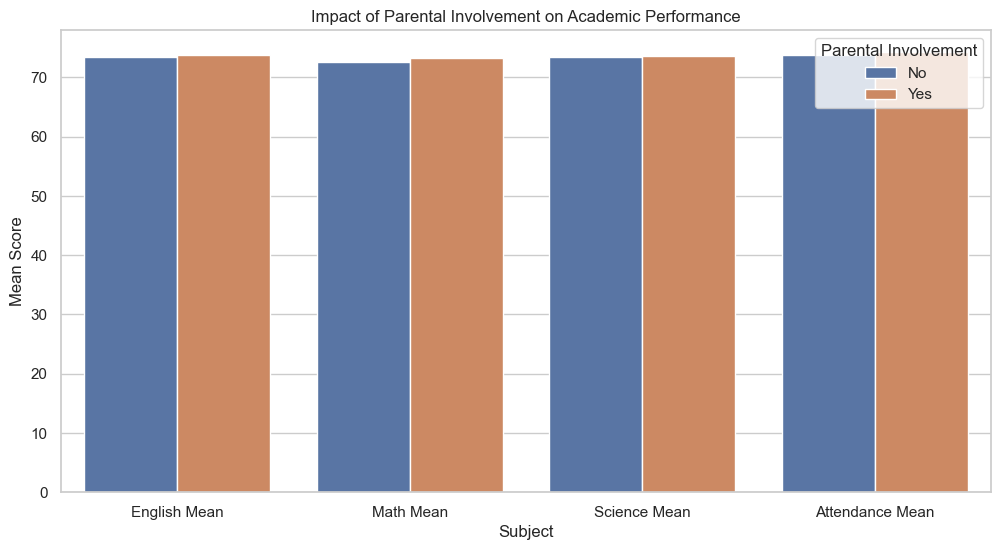

In [23]:
sns.set(style="whitegrid")

# Performance Comparison
performance_columns = ['English Mean', 'Math Mean', 'Science Mean', 'Attendance Mean']

performance_summary = summary.melt(id_vars=['Parental Involvement'], value_vars=performance_columns,
                                    var_name='Subject', value_name='Mean Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='Mean Score', hue='Parental Involvement', data=performance_summary)
plt.title('Impact of Parental Involvement on Academic Performance')
plt.ylabel('Mean Score')
plt.show()

In [24]:
df['parental_involvement_numeric'] = df['parental_involvement'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation matrix
correlation_matrix = df[['parental_involvement_numeric', 'english', 'math', 'science', 'attendance']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                              parental_involvement_numeric   english  \
parental_involvement_numeric                      1.000000  0.008322   
english                                           0.008322  1.000000   
math                                              0.021157  0.811724   
science                                           0.009403  0.807545   
attendance                                        0.018147  0.449669   

                                  math   science  attendance  
parental_involvement_numeric  0.021157  0.009403    0.018147  
english                       0.811724  0.807545    0.449669  
math                          1.000000  0.802763    0.453529  
science                       0.802763  1.000000    0.458360  
attendance                    0.453529  0.458360    1.000000  


Parental Involvement: It does not have a significant linear relationship with academic performance or attendance in this dataset.
Subject Interrelationships: There are strong positive correlations between scores in English, Math, and Science, suggesting that performance in one subject is a good indicator of performance in others.
Attendance: Moderate positive correlations with subject scores suggest that consistent attendance might help improve academic outcomes.

In [25]:
average_scores = df[['english', 'math', 'science', 'social_science', 'art_culture']].mean()

# Convert to DataFrame for better readability
average_scores_df = average_scores.reset_index()
average_scores_df.columns = ['Subject', 'Average Score']

print("\nAverage Scores in Subjects:")
print(average_scores_df)


Average Scores in Subjects:
          Subject  Average Score
0         english      73.610427
1            math      72.938110
2         science      73.524036
3  social_science      74.465513
4     art_culture      76.236066


In [28]:
age_performance = df.groupby('age').agg({
    'english': 'mean',
    'math': 'mean',
    'science': 'mean',
    'social_science': 'mean',
    'art_culture': 'mean'
}).reset_index()

print("\nAverage Scores by Age:")
print(age_performance)

school_type_performance = df.groupby('school_type').agg({
    'english': 'mean',
    'math': 'mean',
    'science': 'mean',
    'social_science': 'mean',
    'art_culture': 'mean'
}).reset_index()

print("\nAverage Scores by School Type:")
print(school_type_performance)


Average Scores by Age:
   age    english       math    science  social_science  art_culture
0   10  65.000000  68.000000  64.000000       67.000000    72.000000
1   15  73.153349  72.385795  73.163035       73.858757    75.833737
2   16  73.464521  72.645627  73.318894       74.441832    76.334983
3   17  73.719862  73.032434  73.731343       74.590126    76.356774
4   18  74.064371  73.685629  73.933383       74.847305    76.404192
5   19  73.174603  73.468254  71.055556       73.507937    73.238095
6   24  78.000000  82.000000  79.000000       75.000000    76.000000

Average Scores by School Type:
  school_type    english       math    science  social_science  art_culture
0        Govt  73.768010  73.088543  73.418597       74.736592    76.355125
1     Private  76.586048  76.039265  76.496658       77.218463    78.668755
2   Semi_Govt  71.125856  70.362895  71.312031       72.038148    74.214868


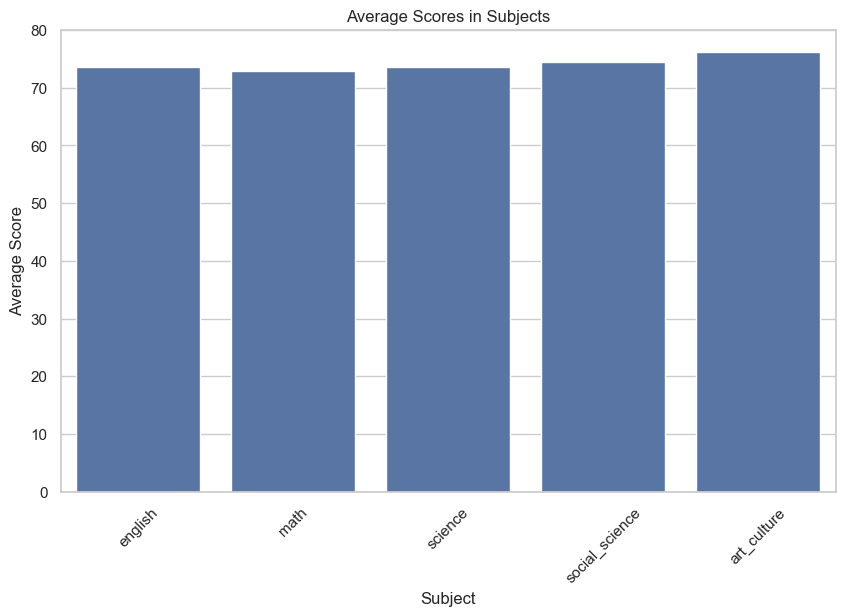

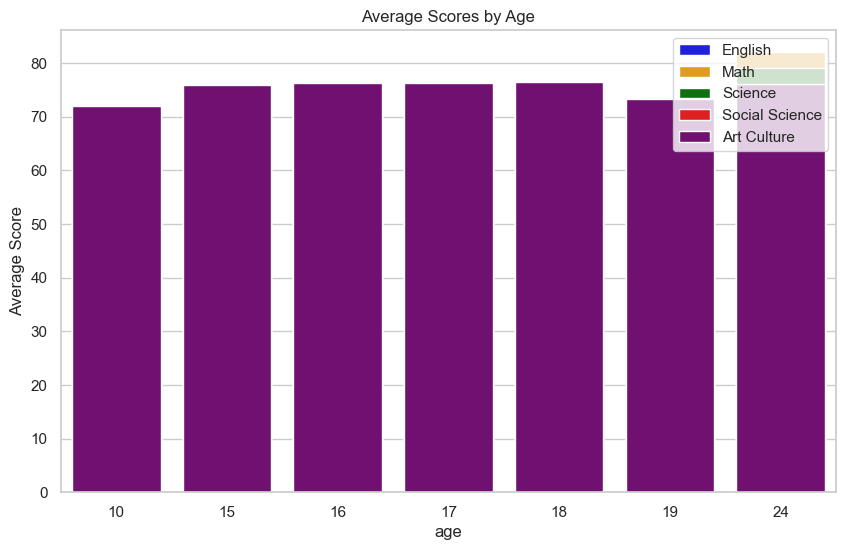

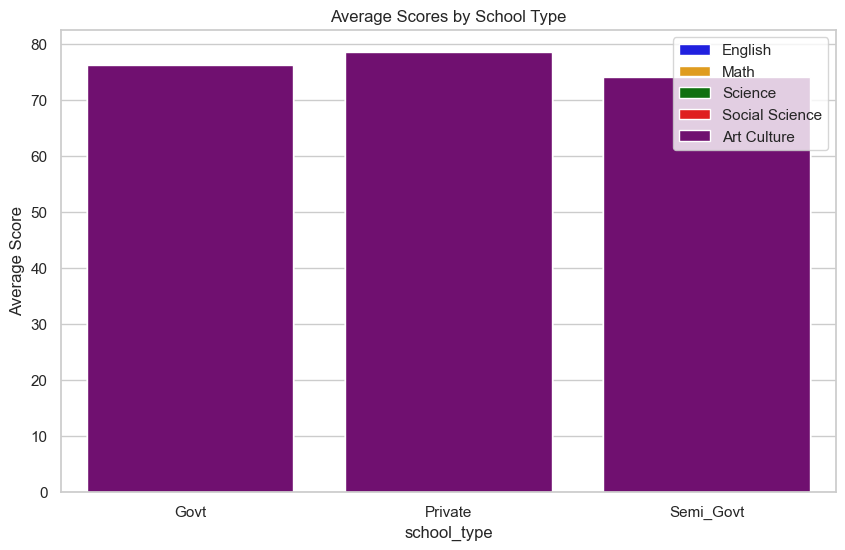

In [31]:
sns.set(style="whitegrid")

# Plotting average scores in subjects
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Average Score', data=average_scores_df)
plt.title('Average Scores in Subjects')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

# Plotting average scores by age
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='english', data=age_performance, color='blue', label='English')
sns.barplot(x='age', y='math', data=age_performance, color='orange', label='Math')
sns.barplot(x='age', y='science', data=-, color='green', label='Science')
sns.barplot(x='age', y='social_science', data=age_performance, color='red', label='Social Science')
sns.barplot(x='age', y='art_culture', data=age_performance, color='purple', label='Art Culture')
plt.title('Average Scores by Age')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Plotting average scores by school type
plt.figure(figsize=(10, 6))
sns.barplot(x='school_type', y='english', data=school_type_performance, color='blue', label='English')
sns.barplot(x='school_type', y='math', data=school_type_performance, color='orange', label='Math')
sns.barplot(x='school_type', y='science', data=school_type_performance, color='green', label='Science')
sns.barplot(x='school_type', y='social_science', data=school_type_performance, color='red', label='Social Science')
sns.barplot(x='school_type', y='art_culture', data=school_type_performance, color='purple', label='Art Culture')
plt.title('Average Scores by School Type')
plt.ylabel('Average Score')
plt.legend()
plt.show()

Consistency: The dataset shows consistent performance across subjects, age groups, and school types.
No Significant Variations: Neither age nor school type seems to have a major influence on average scores, implying that other factors (e.g., individual effort, teaching quality, or external influences) might play a more critical role.

In [32]:
print(df.isnull().sum())

id                               0
full_name                        0
age                              0
gender                           0
location                         1
family_size                      0
mother_education                10
father_education                 4
mother_job                       0
father_job                       0
guardian                         0
parental_involvement             0
internet_access                  0
studytime                        0
tutoring                         0
school_type                      0
attendance                       0
extra_curricular_activities      0
english                          0
math                             0
science                          0
social_science                   0
art_culture                      0
stu_group                        0
parental_involvement_numeric     0
dtype: int64


In [33]:
df['extracurricular_participation'] = df['extra_curricular_activities'].apply(lambda x: 1 if x == 'Yes' else 0)

average_scores = df.groupby('extracurricular_participation').agg({
    'english': 'mean',
    'math': 'mean',
    'science': 'mean',
    'social_science': 'mean',
    'art_culture': 'mean'
}).reset_index()

# Rename the columns for better readability
average_scores.columns = ['Extracurricular Participation', 'English Avg', 'Math Avg', 'Science Avg', 'Social Science Avg', 'Art Culture Avg']

print("\nAverage Scores by Extracurricular Participation:")
print(average_scores)


Average Scores by Extracurricular Participation:
   Extracurricular Participation  English Avg   Math Avg  Science Avg  \
0                              0    73.516009  72.733681    73.390419   
1                              1    73.693432  73.117827    73.641501   

   Social Science Avg  Art Culture Avg  
0           74.380491        76.126334  
1           74.540257        76.332533  


from scipy import stats
scores_extracurricular = df[df['extracurricular_participation'] == 1]
scores_no_extracurricular = df[df['extracurricular_participation'] == 0]

# Perform t-tests for each subject
t_tests_results = {}
for subject in ['english', 'math', 'science', 'social_science', 'art_culture']:
    t_stat, p_val = stats.ttest_ind(scores_extracurricular[subject], scores_no_extracurricular[subject])
    t_tests_results[subject] = {'t-statistic': t_stat, 'p-value': p_val}

print("\nT-test Results:")
for subject, result in t_tests_results.items():
    print(f"{subject.capitalize()}: t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")

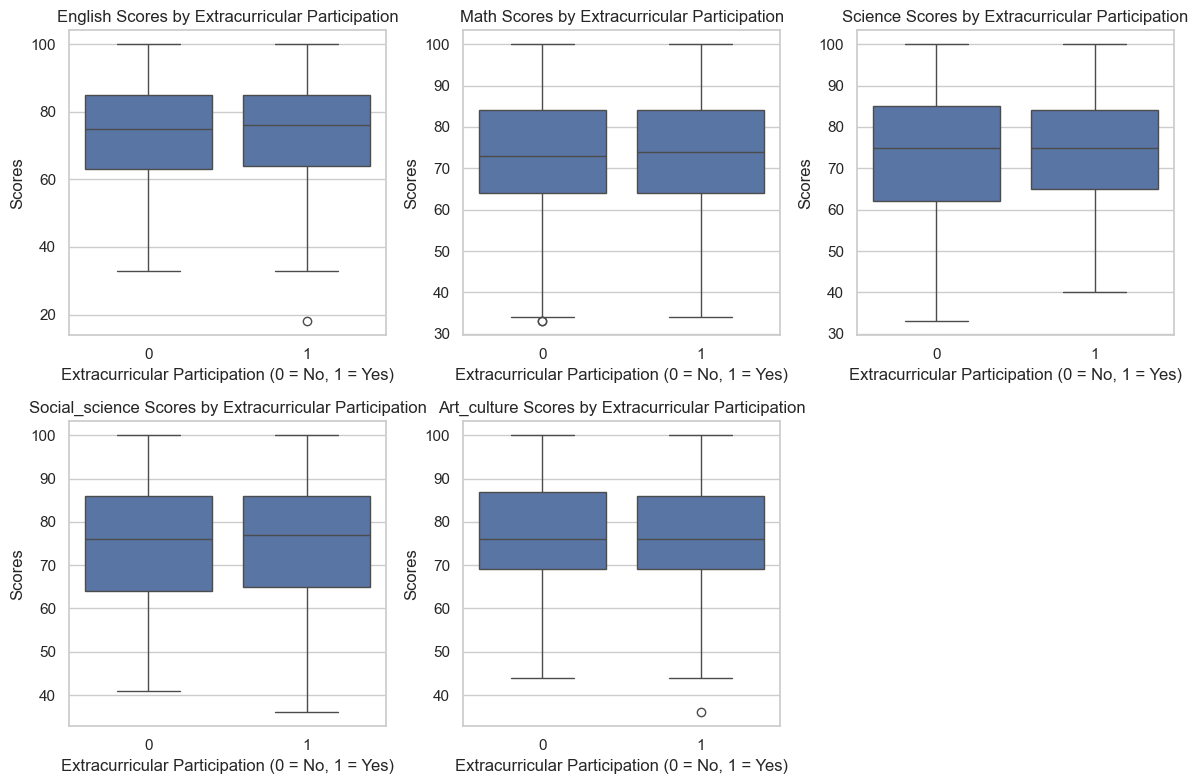

In [35]:
sns.set(style="whitegrid")

# Create a boxplot to visualize scores by extracurricular participation
plt.figure(figsize=(12, 8))
for i, subject in enumerate(['english', 'math', 'science', 'social_science', 'art_culture'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='extracurricular_participation', y=subject, data=df)
    plt.title(f'{subject.capitalize()} Scores by Extracurricular Participation')
    plt.xlabel('Extracurricular Participation (0 = No, 1 = Yes)')
    plt.ylabel('Scores')

plt.tight_layout()
plt.show()

The graph depicts a statistical analysis that shows no significant difference in academic performance between students who participate in extracurricular activities and those who don't, across the subjects analyzed.

2024-11-19 10:54:39.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 10:54:39.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 10:54:39.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 10:54:39.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 10:54:39.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 10:54:39.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\VISHNU\AppData\Local\Temp\ipykernel_7756\1902511357.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.bo

DeltaGenerator()

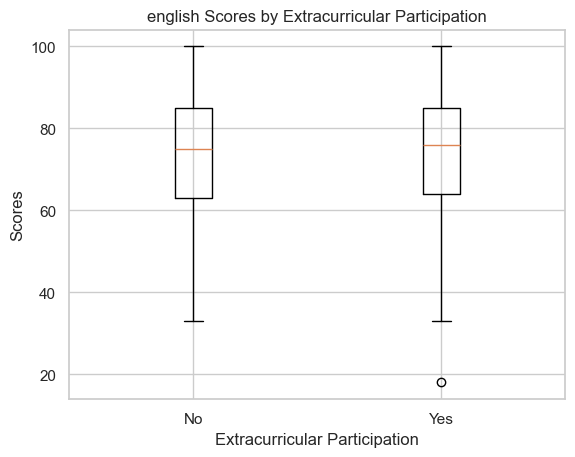

In [39]:
import streamlit as st

subject = st.selectbox(
    'Select Subject',
    ['english', 'math', 'science', 'social_science', 'art_culture']
)

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(
    [df[df['extracurricular_participation'] == 0][subject],
     df[df['extracurricular_participation'] == 1][subject]],
    labels=['No', 'Yes']
)
ax.set_ylabel('Scores')
ax.set_xlabel('Extracurricular Participation')
ax.set_title(f'{subject} Scores by Extracurricular Participation')

# Display the plot
st.pyplot(fig)